In [78]:
import h5py as h5
import numpy as np
import neuraltda.SimplicialComplex as sc
import matplotlib.pyplot as plt
%matplotlib inline
reload(sc)

<module 'neuraltda.SimplicialComplex' from '/Users/brad/GentnerLab/code/NeuralTDA/neuraltda/SimplicialComplex.py'>

In [3]:
fname = '/Users/brad/test_binned_data/B1235_cat_P01_S01_1-good-50ms-stim.binned'
f = h5.File(fname, 'r')

In [4]:
stimdata = f['A_scaled_burung']
trialdata = stimdata['0']

In [5]:
def binnedtobinary(popvec, thresh):
    
    popvec = np.array(popvec)
    Ncells, Nwin = np.shape(popvec)
    means = popvec.sum(1)/Nwin
    means = np.tile(means, (Nwin, 1)).T
    meanthr = thresh*means
    
    activeUnits = np.greater(popvec, meanthr).astype(int)
    return activeUnits
    
def BinaryToMaxSimplex(binMat):
    
    Ncells, Nwin = np.shape(binMat)
    MaxSimps = []
    for cell in range(Ncells):
        if binMat[cell, :].any():
            verts = np.arange(Nwin)[binMat[cell, :] == 1]
            verts = np.sort(verts)
            MaxSimps.append(list(verts))
    return MaxSimps
        
def ShuffleBinary(binMat):
    retMat = np.array(binMat)
    Ncells, Nwin = np.shape(binMat)
    for cell in range(Ncells):
        np.random.shuffle(retMat[cell, :])
    return retMat
        
    

In [6]:
popvec = trialdata['pop_vec'][:10, :]

tst = binnedtobinary(popvec, 6.0)
tst_shuffled = ShuffleBinary(tst)
tst2 = BinaryToMaxSimplex(tst)
tst2_shuffled = BinaryToMaxSimplex(tst_shuffled)
print(tst2)
print(tst2_shuffled)

[[60, 61, 90, 102], [18, 56, 62, 102, 112], [19, 23, 32, 33, 40, 41, 55, 56, 57, 83, 84, 102, 105, 116], [8, 20, 25, 27, 28, 36, 45, 62, 71, 76, 82, 87, 98, 108, 110, 115, 118, 120], [82], [23, 35, 52, 58, 61, 82, 83, 91, 104], [93], [53, 62]]
[[40, 52, 97, 114], [8, 62, 65, 83, 103], [32, 43, 57, 74, 75, 78, 92, 97, 99, 107, 112, 115, 128, 132], [1, 2, 19, 31, 36, 43, 50, 52, 74, 78, 82, 90, 93, 99, 108, 111, 125, 131], [63], [9, 21, 63, 78, 82, 85, 98, 108, 127], [94], [37, 78]]


In [7]:
spikeComplex = sc.SimplicialComplex(tst2)
spikeComplex.updateAdjacency()
shuffledspikeComplex = sc.SimplicialComplex(tst2_shuffled)
shuffledspikeComplex.updateAdjacency()

In [8]:
print( [len(spikeComplex.nSimplexDict[s]) for s in range(spikeComplex.dimension)])
print( [len(shuffledspikeComplex.nSimplexDict[s]) for s in range(shuffledspikeComplex.dimension)])

[44, 295, 1278, 4193, 10697, 21651, 35292, 46770, 50623, 44759, 32188, 18655, 8582, 3061, 816, 153, 18]
[43, 288, 1273, 4192, 10697, 21651, 35292, 46770, 50623, 44759, 32188, 18655, 8582, 3061, 816, 153, 18]


In [16]:
dsimps = spikeComplex.nSimplexDict[4]
nsimps = len(dsimps)
s1 = dsimps[4]
s2 = dsimps[123]
s1c = s1.cofaces
s2c = s2.cofaces


False

In [92]:
dim=3
spec = spikeComplex.getSpectrum(dim)
specshuff = shuffledspikeComplex.getSpectrum(dim)
print(spec)
print(specshuff)

[ 14.65685425+0.j  38.52417470+0.j  36.52417470+0.j ...,  16.00000000+0.j
  16.00000000+0.j   4.00000000+0.j]
[ 14.65685425+0.j  38.52417470+0.j  36.52417470+0.j ...,  16.00000000+0.j
  16.00000000+0.j   4.00000000+0.j]


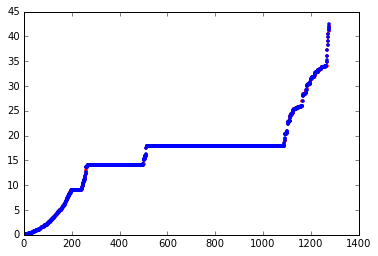

In [91]:
plt.plot(range(len(spec)), np.sort(spec),'r.', range(len(specshuff)), np.sort(specshuff), 'b.')

In [104]:
popvec = trialdata['pop_vec'][:, :]

tst = binnedtobinary(popvec, 6.0)
tst_shuffled = ShuffleBinary(tst)
tst = np.transpose(tst)
tst_shuffled = np.transpose(tst_shuffled)
tst2 = BinaryToMaxSimplex(tst)
tst2_shuffled = BinaryToMaxSimplex(tst_shuffled)
print(tst[3, :])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [105]:
spikeComplexT = sc.SimplicialComplex(tst2)
spikeComplexT.updateAdjacency()
shuffledspikeComplexT = sc.SimplicialComplex(tst2_shuffled)
shuffledspikeComplexT.updateAdjacency()

In [106]:
print( [len(spikeComplexT.nSimplexDict[s]) for s in range(spikeComplexT.dimension)])
print( [len(shuffledspikeComplexT.nSimplexDict[s]) for s in range(shuffledspikeComplexT.dimension)])

[30, 143, 187, 143, 83, 35, 9]
[30, 93, 63, 28, 8]


In [119]:
dim=5
spec = spikeComplexT.getSpectrum(dim)
specshuff = shuffledspikeComplexT.getSpectrum(dim)
print(spec)
print(specshuff)
plt.plot(range(len(spec)), np.sort(spec),'r.', range(len(specshuff)), np.sort(specshuff), 'b.')

KeyError: 6

In [93]:
def computeSpectrogram(spec, sigma, lam):
    
    sig = np.zeros(np.shape(lam))
    for eigval in spec:
        gaussian = np.exp(-(lam-eigval)**2 / (2*sigma**2)) / (np.sqrt(2*np.pi*sigma**2))
        sig = sig+gaussian
    return sig

In [120]:
t = np.linspace(0, 18, 1000)
specg = computeSpectrogram(spec, 0.05, t)

In [94]:
def computeAvgSpectrogram(stimdata, thresh, sigma, dim):
    
    t = np.linspace(0, 100, 5000)
    sigspec = np.zeros(t.shape)
    sigspecshuff = np.zeros(t.shape)
    ntrials = len(stimdata.keys())
    for trial in stimdata.keys():
        popvec = np.array(stimdata[trial]['pop_vec'])
        tst = binnedtobinary(popvec, thresh)
        tst_shuffled = ShuffleBinary(tst)
        tst = np.transpose(tst)
        tst_shuffled = np.transpose(tst_shuffled)
        tst2 = BinaryToMaxSimplex(tst)
        tst2_shuffled = BinaryToMaxSimplex(tst_shuffled)
        
        print('Creating spike complexes for trial: %s' % trial)
        spikeComplex = sc.SimplicialComplex(tst2)
        spikeComplex.updateAdjacency()
        shuffledSpikeComplex = sc.SimplicialComplex(tst2_shuffled)
        shuffledSpikeComplex.updateAdjacency()
        try:
            spec = spikeComplex.getSpectrum(dim)
            sigspec = sigspec + computeSpectrogram(spec, sigma, t)
        except KeyError:
            sigspec = sigspec + np.zeros(t.shape)
        try:
            specshuff = shuffledSpikeComplex.getSpectrum(dim)
            sigspecshuff = sigspecshuff + computeSpectrogram(specshuff, sigma, t)
        except KeyError:
            sigspecshuff = sigspecshuff + np.zeros(t.shape)            
    sigspec = sigspec/(float(ntrials))
    sigspecshuff = sigspecshuff/(float(ntrials))
    
    return (sigspec, sigspecshuff)

def computeTrialSpectrograms(stimdata, thresh, sigma, dim):
    
    tlen = 5000
    t = np.linspace(0, 100, tlen)

    ntrials = len(stimdata.keys())
    sigspec = np.zeros((ntrials, tlen))
    sigspecshuff = np.zeros((ntrials, tlen))
    for trialnum, trial in enumerate(stimdata.keys()):
        popvec = np.array(stimdata[trial]['pop_vec'])
        tst = binnedtobinary(popvec, thresh)
        tst_shuffled = ShuffleBinary(tst)
        tst = np.transpose(tst)
        tst_shuffled = np.transpose(tst_shuffled)
        tst2 = BinaryToMaxSimplex(tst)
        tst2_shuffled = BinaryToMaxSimplex(tst_shuffled)
        
        print('Creating spike complexes for trial: %s' % trial)
        spikeComplex = sc.SimplicialComplex(tst2)
        spikeComplex.updateAdjacency()
        shuffledSpikeComplex = sc.SimplicialComplex(tst2_shuffled)
        shuffledSpikeComplex.updateAdjacency()
        try:
            spec = spikeComplex.getSpectrum(dim)
            sigspec[trialnum, :] = computeSpectrogram(spec, sigma, t)
        except KeyError:
            sigspec[trialnum, :] = np.zeros(t.shape)
        try:
            specshuff = shuffledSpikeComplex.getSpectrum(dim)
            sigspecshuff[trialnum, :] = computeSpectrogram(specshuff, sigma, t)
        except KeyError:
            sigspecshuff[trialnum, :] = np.zeros(t.shape)            
    
    return (sigspec, sigspecshuff)

def computeAvgSpectrogramOld(stimdata, thresh, sigma, dim):
    
    t = np.linspace(0, 100, 5000)
    sigspec = np.zeros(t.shape)
    sigspecshuff = np.zeros(t.shape)
    ntrials = len(stimdata.keys())
    for trial in stimdata.keys():
        popvec = np.array(stimdata[trial]['pop_vec'])
        tst = binnedtobinary(popvec, thresh)
        tst_shuffled = ShuffleBinary(tst)
        tst = np.transpose(tst)
        tst_shuffled = np.transpose(tst_shuffled)
        tst2 = BinaryToMaxSimplex(tst)
        tst2_shuffled = BinaryToMaxSimplex(tst_shuffled)

        print('Creating spike complexes for trial: %s' % trial)
        spikeComplex = sc.SimplicialComplex(tst2)
        spikeComplex.updateAdjacency()
        shuffledSpikeComplex = sc.SimplicialComplex(tst2_shuffled)
        shuffledSpikeComplex.updateAdjacency()
        spec = spikeComplex.getSpectrum(dim)
        sigspec = sigspec + computeSpectrogram(spec, sigma, t)

        specshuff = shuffledSpikeComplex.getSpectrum(dim)
        sigspecshuff = sigspecshuff + computeSpectrogram(specshuff, sigma, t)
         
    sigspec = sigspec/(float(ntrials))
    sigspecshuff = sigspecshuff/(float(ntrials))
    
    return (sigspec, sigspecshuff)
        

In [146]:
fname = '/home/brad/B1235_cat_P01_S01_1-good-50ms-stim.binned'
fname = '/mnt/cube/btheilma/experiments/B1087/phy040516/Pen03_Lft_AP0_ML500__Site02_Z2500__B1087_cat_P03_S02_1/binned_data/20160909T194413Z/20160909T194413Z-50.binned'
f = h5.File(fname, 'r')
print(f.keys())
stimAdata = f['I_40k']
stimBdata = f['J_40k']

[u'I_40k', u'J_40k', u'K_40k', u'L_40k', u'M_40k', u'N_40k', u'O_40k', u'P_40k']


In [89]:
fname = '/Users/brad/test_binned_data/B1235_cat_P01_S01_1-good-50ms-stim.binned'
f = h5.File(fname, 'r')
print(f.keys())
stimAdata = f['A_scaled_burung']
stimBdata = f['B_scaled_burung']

[u'A_scaled_burung', u'B_scaled_burung', u'C_scaled_burung', u'D_scaled_burung', u'E_scaled_burung', u'F_scaled_burung', u'G_scaled_burung', u'H_scaled_burung', u'I_scaled_burung', u'J_scaled_burung', u'K_scaled_burung', u'L_scaled_burung', u'M_scaled_burung', u'N_scaled_burung', u'O_scaled_burung', u'P_scaled_burung']


In [113]:
thresh = 4.0
dim = 6
sigA, sigAshuff = computeAvgSpectrogram(stimAdata, thresh, 0.05, dim)
sigB, sigBshuff = computeAvgSpectrogram(stimBdata, thresh, 0.05, dim)

Creating spike complexes for trial: 0
Creating spike complexes for trial: 1
Creating spike complexes for trial: 10
Creating spike complexes for trial: 11
Creating spike complexes for trial: 12
Creating spike complexes for trial: 13
Creating spike complexes for trial: 14
Creating spike complexes for trial: 15
Creating spike complexes for trial: 16
Creating spike complexes for trial: 17
Creating spike complexes for trial: 18
Creating spike complexes for trial: 19
Creating spike complexes for trial: 2
Creating spike complexes for trial: 3
Creating spike complexes for trial: 4
Creating spike complexes for trial: 5
Creating spike complexes for trial: 6
Creating spike complexes for trial: 7
Creating spike complexes for trial: 8
Creating spike complexes for trial: 9
Creating spike complexes for trial: 0
Creating spike complexes for trial: 1
Creating spike complexes for trial: 10
Creating spike complexes for trial: 11
Creating spike complexes for trial: 12
Creating spike complexes for trial: 1

In [125]:
sigAtrial, sigAtrialshuff = computeTrialSpectrograms(stimBdata, thresh, 0.05, dim)

Creating spike complexes for trial: 0


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:60: ComplexWarning: Casting complex values to real discards the imaginary part


Creating spike complexes for trial: 1


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:65: ComplexWarning: Casting complex values to real discards the imaginary part


Creating spike complexes for trial: 10
Creating spike complexes for trial: 11
Creating spike complexes for trial: 12
Creating spike complexes for trial: 13
Creating spike complexes for trial: 14
Creating spike complexes for trial: 15
Creating spike complexes for trial: 16
Creating spike complexes for trial: 17
Creating spike complexes for trial: 18
Creating spike complexes for trial: 19
Creating spike complexes for trial: 2
Creating spike complexes for trial: 3
Creating spike complexes for trial: 4
Creating spike complexes for trial: 5
Creating spike complexes for trial: 6
Creating spike complexes for trial: 7
Creating spike complexes for trial: 8
Creating spike complexes for trial: 9


(0, 100)

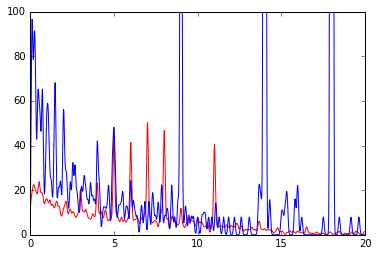

In [60]:
t = np.linspace(0, 100, 5000)
lim = 1000
plt.plot(t[:lim], sig[:lim], 'r', t[:lim], sigshuff[:lim], 'b')
plt.ylim([0, 100])

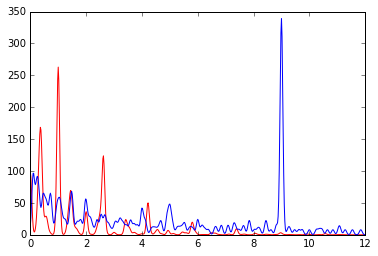

In [47]:
t = np.linspace(0, 100, 5000)
plt.plot(t[:600], sigo[:600], 'r', t[:600], sigshuffo[:600], 'b')

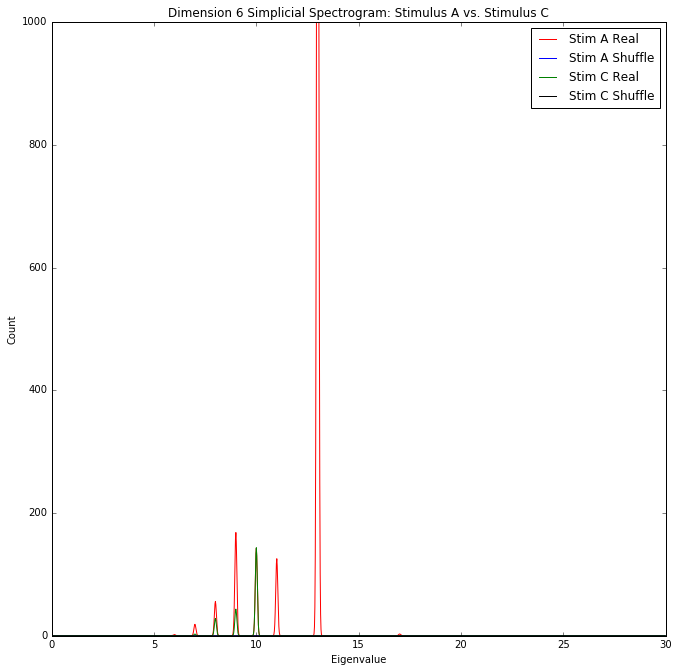

In [114]:
t = np.linspace(0, 100, 5000)
lim = 1500
ymax = 1000
plt.figure(figsize=(11,11))
plt.plot(t[:lim], sigA[:lim], 'r', t[:lim], sigAshuff[:lim], 'b', t[:lim], sigB[:lim], 'g', t[:lim], sigBshuff[:lim], 'k')
plt.ylim([0, ymax])
plt.title('Dimension %d Simplicial Spectrogram: Stimulus A vs. Stimulus C' % dim)
plt.xlabel('Eigenvalue')
plt.ylabel('Count')
plt.legend(['Stim A Real', 'Stim A Shuffle', 'Stim C Real', 'Stim C Shuffle'])

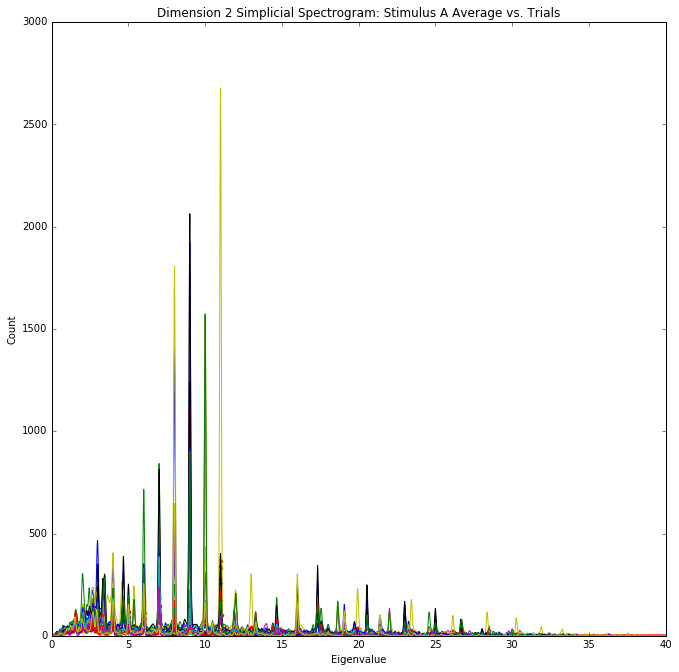

In [128]:
t = np.linspace(0, 100, 5000)
lim = 2000
ymax = 3000
plt.figure(figsize=(11,11))
plt.plot(t[:lim], sigA[:lim],'r.', t[:lim], np.transpose(sigAtrial[:, :lim]))
plt.ylim([0, ymax])
plt.title('Dimension 2 Simplicial Spectrogram: Stimulus A Average vs. Trials')
plt.xlabel('Eigenvalue')
plt.ylabel('Count')

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


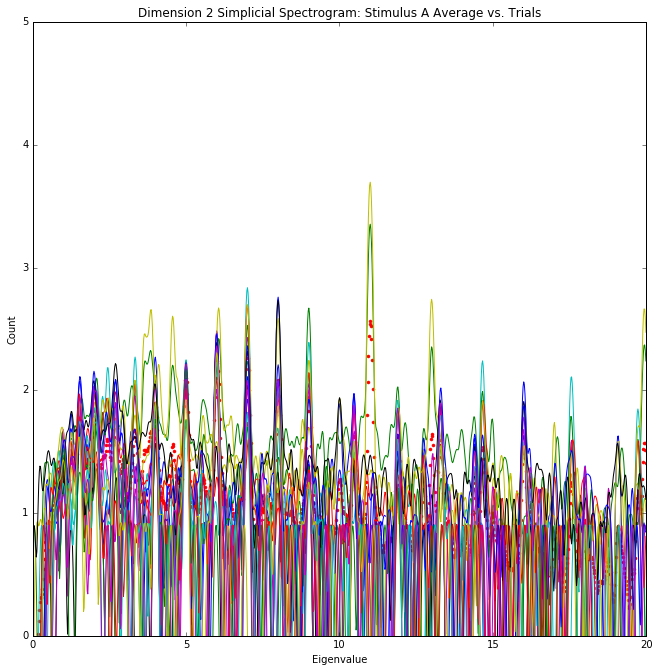

In [121]:
t = np.linspace(0, 100, 5000)
lim = 1000
ymax = 5
plt.figure(figsize=(11,11))
plt.plot(t[:lim], np.log10(sigA[:lim]),'r.', t[:lim], np.log10(np.transpose(sigAtrial[:, :lim])))
plt.ylim([0, ymax])
plt.title('Dimension 2 Simplicial Spectrogram: Stimulus A Average vs. Trials')
plt.xlabel('Eigenvalue')
plt.ylabel('Count')

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


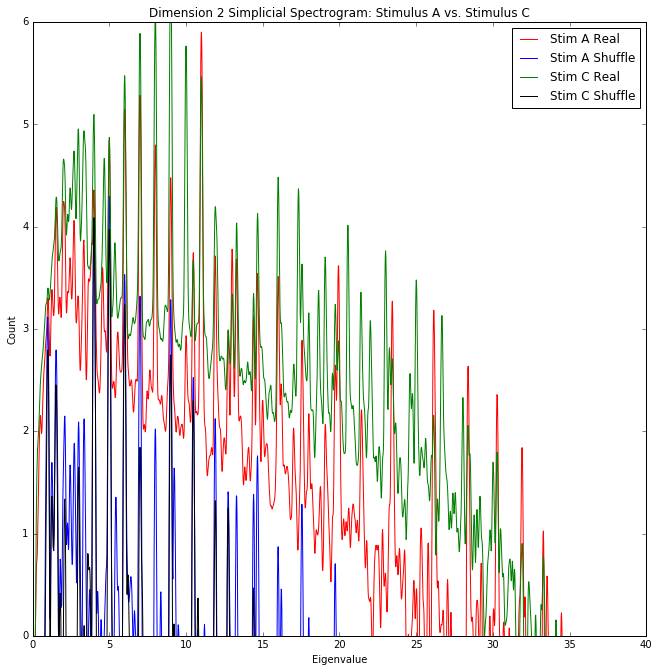

In [124]:
t = np.linspace(0, 100, 5000)
lim = 2000
ymax = 6
plt.figure(figsize=(11,11))
sigAlog = np.log(sigA)
sigAslog = np.log(sigAshuff)
sigBlog = np.log(sigB)
sigBslog = np.log(sigBshuff)
plt.plot(t[:lim], sigAlog[:lim], 'r', t[:lim], sigAslog[:lim], 'b', t[:lim], sigBlog[:lim], 'g', t[:lim], sigBslog[:lim], 'k')
plt.ylim([0, ymax])
plt.title('Dimension 2 Simplicial Spectrogram: Stimulus A vs. Stimulus C')
plt.xlabel('Eigenvalue')
plt.ylabel('Count')
plt.legend(['Stim A Real', 'Stim A Shuffle', 'Stim C Real', 'Stim C Shuffle'])

In [207]:
def makeChord(spec, lam, t):
    
    sig = np.zeros(t.shape)
    maxval = max(spec)
    normspec = spec/float(maxval)
    
    for indx,val in enumerate(normspec):
        sig = sig+val*np.sin(2*np.pi*256*lam[indx]*t)
    return sig

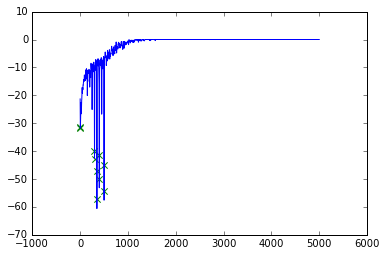

In [225]:
from scipy.signal import convolve
import numpy as np
from matplotlib import pyplot as plt

Y = -sigB

#Obtaining derivative
kernel = [1, 0, -1]
dY = convolve(Y, kernel, 'valid') 

#Checking for sign-flipping
S = np.sign(dY)
ddS = convolve(S, kernel, 'valid')

#These candidates are basically all negative slope positions
#Add one since using 'valid' shrinks the arrays
candidates = np.where(dY < 0)[0] + (len(kernel) - 1)

#Here they are filtered on actually being the final such position in a run of
#negative slopes
peaks = sorted(set(candidates).intersection(np.where(ddS == 2)[0] + 1))

plt.plot(Y)

#If you need a simple filter on peak size you could use:
alpha = -30
peaks = np.array(peaks)[Y[peaks] < alpha]
plt.scatter(peaks, Y[peaks], marker='x', color='g', s=40)

In [226]:
tpeaksA = t[peaks]
sigApeaks = sigA[peaks]
tpeaksB = t[peaks]
sigBpeaks = sigB[peaks]

fs = 20000
dur=5
samps = dur*fs
testsoundA = makeChord(sigA, t, np.linspace(0, dur, samps))
testsoundB = makeChord(sigBpeaks, tpeaksB, np.linspace(0, dur, samps))

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part


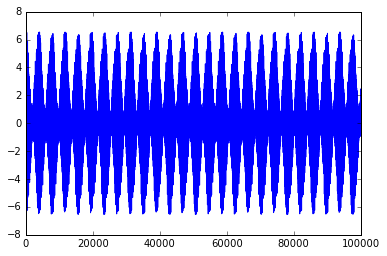

In [217]:
plt.plot(testsoundA)

In [227]:
from scipy.io.wavfile import write

write('testsoundA.wav', fs, testsoundA.astype(float))
write('testsoundB.wav', fs, testsoundB.astype(float))

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


In [85]:
fname = '/Users/brad/test_binned_data/B1235_cat_P01_S01_1-good-50ms-stim.binned'
f = h5.File(fname, 'r')
stimdata = f['A_scaled_burung']
trialdata = stimdata['0']
popvec = trialdata['pop_vec'][:10, :]

tst = binnedtobinary(popvec, 6.0)
tst2 = BinaryToMaxSimplex(tst)
spikeComplex = sc.SimplicialComplex(tst2)
spikeComplex.updateAdjacency()

In [37]:
LDown1 = spikeComplex.computeLowerLaplacianDirect(2)
LUp1 = spikeComplex.computeUpperLaplacianDirect(2)

In [38]:
(LUp1 + LDown1).shape

(1278, 1278)

In [86]:
L = spikeComplex.getLaplacian(2)

array([ 4.,  0.,  0., ...,  0.,  0.,  0.])

In [41]:
(LUp1 + LDown1)

array([[ 4.,  2.,  0., ...,  0.,  0.,  0.],
       [ 2.,  4.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  9.,  2., -2.],
       [ 0.,  0.,  0., ...,  2.,  9.,  0.],
       [ 0.,  0.,  0., ..., -2.,  0.,  9.]])

In [42]:
LDown1

array([[ 3.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  3.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  3., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  3.,  1., -1.],
       [ 0.,  0.,  0., ...,  1.,  3.,  1.],
       [ 0.,  0.,  0., ..., -1.,  1.,  3.]])

In [43]:
LUp1

array([[ 1.,  1., -1., ...,  0.,  0.,  0.],
       [ 1.,  1., -1., ...,  0.,  0.,  0.],
       [-1., -1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  6.,  1., -1.],
       [ 0.,  0.,  0., ...,  1.,  6., -1.],
       [ 0.,  0.,  0., ..., -1., -1.,  6.]])

In [79]:
tstSimp = [[1,2,3], [3,4]]
tstSimpComp = sc.SimplicialComplex(tstSimp)
tstSimpComp.updateAdjacency()

In [104]:
Ld = tstSimpComp.getBoundaryMap(2)

In [105]:
Lu = tstSimpComp.getBoundaryMap(1)

In [83]:
dim = 0
inds = [(tstSimpComp.nSimplexDict[dim][i].index, tstSimpComp.nSimplexDict[dim][i].vertices) for i in range(len(tstSimpComp.nSimplexDict[dim]))]
print(inds)

[(0, [1]), (1, [2]), (2, [3]), (3, [4])]


In [84]:
dim = 1
inds = [(tstSimpComp.nSimplexDict[dim][i].index, tstSimpComp.nSimplexDict[dim][i].vertices) for i in range(len(tstSimpComp.nSimplexDict[dim]))]
print(inds)

[(0, [1, 2]), (1, [1, 3]), (2, [2, 3]), (3, [3, 4])]


In [68]:
[1,2,3,4] - [1,2,3]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [73]:
a = [1,2,3,4]
t=set((1,2,3,4)) - set((1,2,3))

In [71]:
a == 4

False

In [77]:
a.index(list(t)[0])

3

In [82]:
tstSimpComp.getLaplacian(1)

array([[ 3.,  0.,  0.,  0.],
       [ 0.,  3.,  0., -1.],
       [ 0.,  0.,  3., -1.],
       [ 0., -1., -1.,  2.]])

In [106]:
np.dot(Ld, np.transpose(Ld))

array([[ 1., -1.,  1.,  0.],
       [-1.,  1., -1.,  0.],
       [ 1., -1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [107]:
np.dot(np.transpose(Lu), Lu)

array([[ 2.,  1., -1.,  0.],
       [ 1.,  2.,  1., -1.],
       [-1.,  1.,  2., -1.],
       [ 0., -1., -1.,  2.]])

In [108]:
Ld

array([[ 1.],
       [-1.],
       [ 1.],
       [ 0.]])